In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2]:
df = pd.read_csv('university_student_dropout_data.csv')
df.head()


FileNotFoundError: [Errno 2] No such file or directory: 'university_student_dropout_data.csv'

In [3]:
from google.colab import files
uploaded = files.upload()


Saving university_student_dropout_data.csv to university_student_dropout_data.csv


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [5]:
df = pd.read_csv('university_student_dropout_data.csv')
df.head()


,StudentID,GPA,AttendanceRate,Gender,FinancialSupport,ParentalEducation,DistanceFromCampus,StudyHoursPerWeek,SatisfactionLevel,Dropout
0,1,2.85,71.7,Male,Yes,Diploma,47,10,3.4,0
1,2,2.40,74.4,Female,Yes,Degree,14,16,3.2,1
2,3,2.95,87.5,Female,No,High School,39,8,4.6,0
3,4,3.57,86.1,Male,Yes,High School,25,8,2.6,0
4,5,2.34,79.8,Female,Yes,Degree,20,17,2.3,0


In [6]:
label_cols = ['Gender', 'FinancialSupport', 'ParentalEducation']
label_encoders = {}

for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


In [7]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   StudentID           300 non-null    int64  
 1   GPA                 300 non-null    float64
 2   AttendanceRate      300 non-null    float64
 3   Gender              300 non-null    int64  
 4   FinancialSupport    300 non-null    int64  
 5   ParentalEducation   300 non-null    int64  
 6   DistanceFromCampus  300 non-null    int64  
 7   StudyHoursPerWeek   300 non-null    int64  
 8   SatisfactionLevel   300 non-null    float64
 9   Dropout             300 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 23.6 KB


,0
StudentID,0
GPA,0
AttendanceRate,0
Gender,0
FinancialSupport,0
ParentalEducation,0
DistanceFromCampus,0
StudyHoursPerWeek,0
SatisfactionLevel,0
Dropout,0


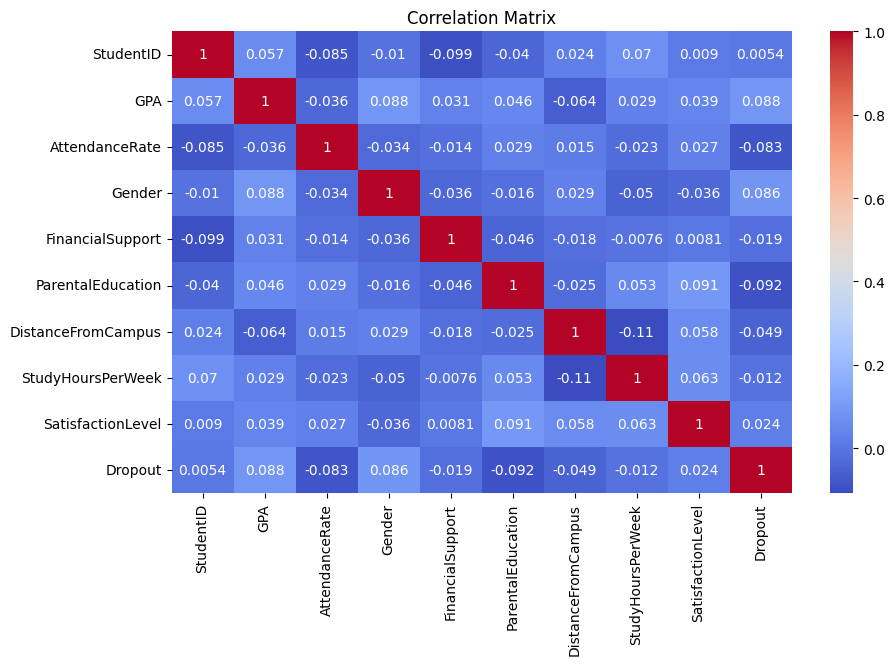

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


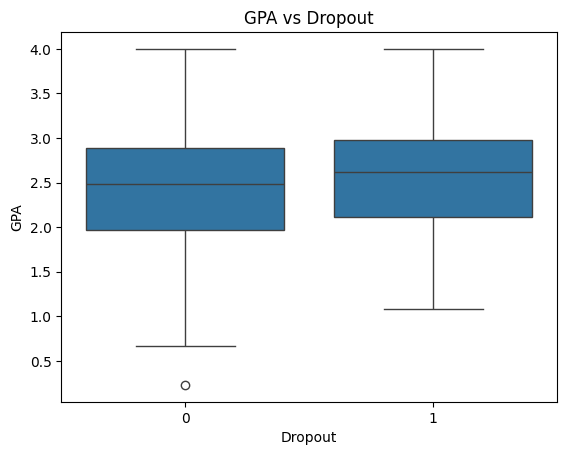

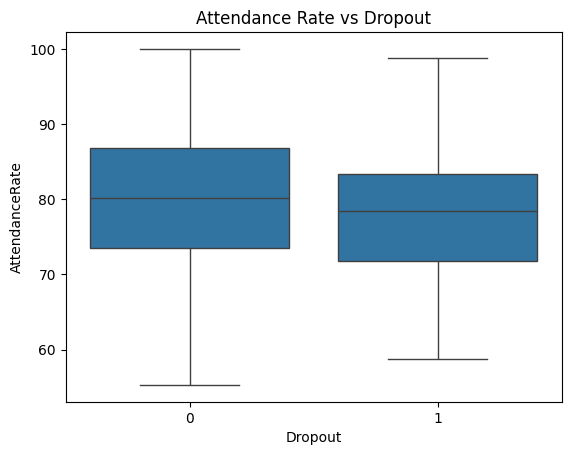

In [9]:
sns.boxplot(x='Dropout', y='GPA', data=df)
plt.title("GPA vs Dropout")
plt.show()

sns.boxplot(x='Dropout', y='AttendanceRate', data=df)
plt.title("Attendance Rate vs Dropout")
plt.show()


In [10]:
X = df.drop(['StudentID', 'Dropout'], axis=1)
y = df['Dropout']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[36  1]
 [22  1]]
              precision    recall  f1-score   support

           0       0.62      0.97      0.76        37
           1       0.50      0.04      0.08        23

    accuracy                           0.62        60
   macro avg       0.56      0.51      0.42        60
weighted avg       0.57      0.62      0.50        60



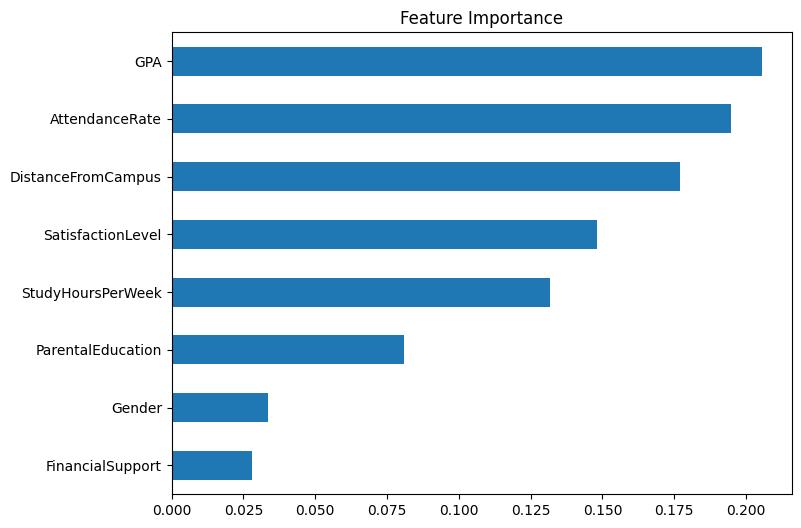

In [13]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh', figsize=(8,6))
plt.title("Feature Importance")
plt.show()
